Import STDLIB

In [1]:
import numpy as np # for computation
import matplotlib.pyplot as plt # for plotting (line below keeps plots within notebook)
import matplotlib.ticker # to modify tick marks
%matplotlib inline
from astropy.io import ascii # for reading in CSV
from PIL import Image # for manipulating jpgs, pngs, etc.
import os # for directories, etc. 

Read in and Format Data

In [2]:
data_file = ascii.read('./Figure_Data.csv')
#print data_file.colnames

def find_angular_size(size, distance, angle='rad'):
    if angle == 'rad':
        return size / distance
    elif angle == 'arcsec':
        return 2.06265e5 * size / distance 

objects = data_file['Object']
 
size = data_file['Radius (km)']
distance = data_file['Average Distance from Earth (km)']

print find_angular_size(size[objects=='Sirius'], distance[objects=='Sirius'], angle='arcsec')

#for i in range(len(data_file)):
#print data_file['Object'], find_angular_size(size, distance,angle='arcsec') # just checking
    
#print 'Pictures gathered so far:', os.listdir('./astro_scale/'), '\n'
#print 'Objects in CSV:', [i for i in objects]

objects_to_plot = {
    'exoplanet':[find_angular_size(size[objects=='exoplanet'], distance[objects=='exoplanet'], angle='arcsec')[0], './astro_scale/exoplanet.jpg'],
    'accretion_disk':[find_angular_size(size[objects=='Sag_A_accretion_disk'], distance[objects=='Sag_A_accretion_disk'], angle='arcsec')[0], './astro_scale/SigA%2a_BlackHoles.jpg'],
    'quasar':[find_angular_size(size[objects=='quasar'], distance[objects=='quasar'], angle='arcsec')[0], './astro_scale/Quasar_1127_xray.jpg'],
    'Betelgeuse':[find_angular_size(size[objects=='Betelgeuse'], distance[objects=='Betelgeuse'], angle='arcsec')[0], './astro_scale/betelgeuse.jpg'],
    'Sirius':[find_angular_size(size[objects=='Sirius'], distance[objects=='Sirius'], angle='arcsec')[0], './astro_scale/sirius_600.jpg'],
    'Vesta':[find_angular_size(size[objects=='Vesta'], distance[objects=='Vesta'], angle='arcsec')[0], './astro_scale/asteroid_large.jpg'],
    'Mercury':[find_angular_size(size[objects=='Mercury'], distance[objects=='Mercury'], angle='arcsec')[0], './astro_scale/Mercury_in_color.png'],
    'Moon':[find_angular_size(size[objects=='Moon'], distance[objects=='Moon'], angle='arcsec')[0], './astro_scale/Solar_eclipse.png'],
    'Andromeda':[find_angular_size(size[objects=='Andromeda'], distance[objects=='Andromeda'], angle='arcsec')[0], './astro_scale/m31withandwithoutstars.jpg'],
    'Jupiter':[find_angular_size(size[objects=='Jupiter'], distance[objects=='Jupiter'], angle='arcsec')[0], './astro_scale/Jupiter_main_PIA14410_full.png'],
    'M104':[find_angular_size(size[objects=='M104'], distance[objects=='M104'], angle='arcsec')[0], './astro_scale/m104.png'] 
}

keys = ['exoplanet', 'accretion_disk', 'quasar', 'Sirius', 'Betelgeuse','Vesta', 'Mercury', 'Jupiter', 'M104', 'Moon', 'Andromeda']

  Radius (km)   
----------------
0.00301172208589


Angular Resolution Plot

In [3]:
def year2tick(year, maxy=2020):
    return maxy*((np.array(year)-1600.0)/(maxy-1600.0))**18


[  1.83328216e-27   2.06298075e+02   5.32141426e+02   8.39351723e+02
   1.30910223e+03   1.62828298e+03   1.85369046e+03]
(2168, 2311, 3)
0.243550872803


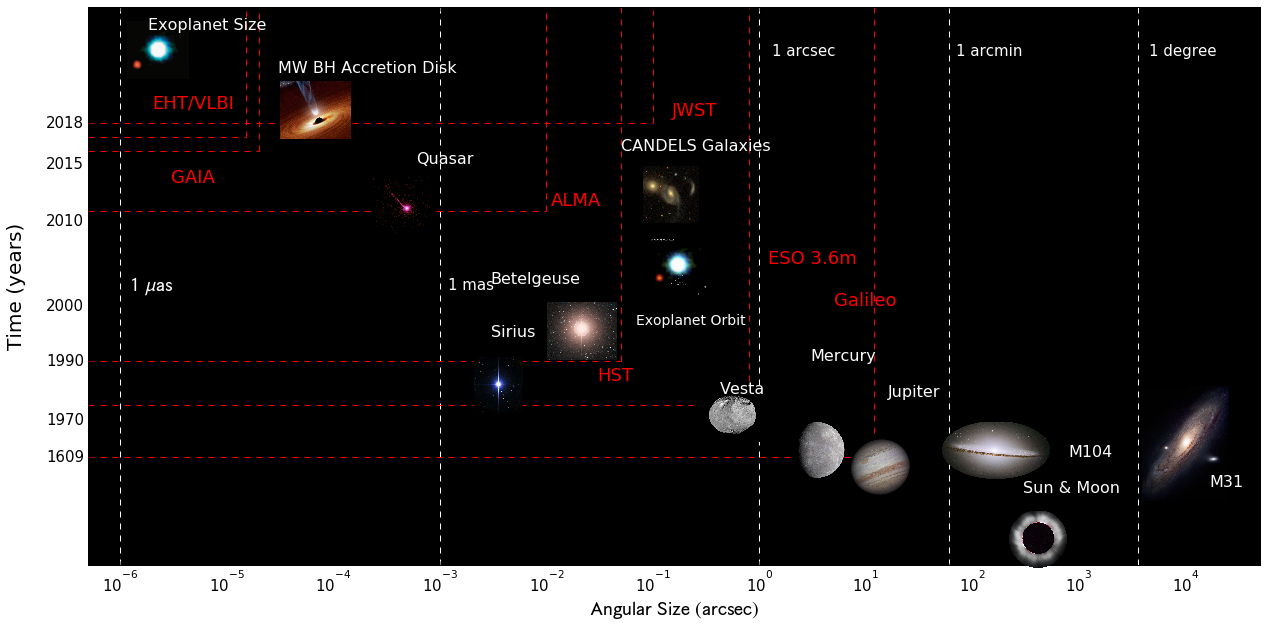

In [32]:
lbl_ft_sz = 18 # label font size
plot_lbl_ft_sz = 12

from matplotlib import rc # needed to modify TeX font; I don't like serif fonts too much
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)

fig = plt.figure(figsize=(21,10)) # create figure and set size - W, H, in inches
ax = plt.subplot(111) # add an axis object

ax.set_axis_bgcolor('black') # set background color to black
ax.set_xscale('log') # make x-axis log scale

ax.set_xlim(5e-7, 5e4) # set x-axis limits
ax.set_xticks([10 ** i for i in range(-6, 5)])

 
#ax.set_yticks([1600, 1700, 1800, 1900, 2000])
 
#ax.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
ax.set_xlabel(r'$\rm{Angular \ Size} \ (\rm{arcsec})$', size=lbl_ft_sz + 2) # label x-axis
ax.set_ylabel('Time (years)', size=lbl_ft_sz + 2)
ax.yaxis.labelpad = 20
#ax.set_ylim(1450, 2250)


yticks=[1609, 1970, 1990, 2000, 2010, 2015, 2018]
print year2tick(yticks, 2020)
plt.yticks(year2tick(yticks, 2020),['1609','1970','1990','2000','2010','2015','2018'])
ax.set_ylim(-600, 2500)

plt.setp(ax.get_xticklabels(), fontsize=15) # make x-axis tick marks larger
plt.setp(ax.get_yticklabels(), fontsize=15)
#plt.setp(ax, yticks=[]) # remove y-axis tick marks

yrange = [-600,2500]
xrange_plot = [5e-7, 5e4]
yoffset = 0.99 * 2250

ax.plot([1, 1], yrange, color='white', linestyle='--')
ax.text(1.3, yoffset, '1 arcsec', color='white', size=lbl_ft_sz - 3)
#ax.text(1.3, 0.85, 'Fried Length', color='white', size=lbl_ft_sz - 4)

ax.plot([60, 60], yrange, color='white', linestyle='--')
ax.text(70, yoffset, '1 arcmin', color='white', size=lbl_ft_sz - 3)

ax.plot([3600, 3600], yrange, color='white', linestyle='--')
ax.text(4500, yoffset, '1 degree', color='white', size=lbl_ft_sz - 3)

ax.plot([0.001, 0.001], yrange, color='white', linestyle='--')
ax.text(0.0012, yoffset-1300, '1 mas', color='white', size=lbl_ft_sz - 3)

ax.plot([1e-6, 1e-6], yrange, color='white', linestyle='--')
ax.text(1.2e-6, yoffset-1300, r'$1 \ \mu \rm{as}$', color='white', size=lbl_ft_sz+2)


ax.plot([5e-7, 12], [year2tick(1609), year2tick(1609)], color='red', linestyle='--')
ax.plot([12, 12] ,[year2tick(1609), year2tick(2250)], color='red', linestyle='--')
ax.text(5, year2tick(2000), 'Galileo', color='red', size=lbl_ft_sz)

ax.plot([5e-7, 0.05], [year2tick(1990), year2tick(1990)], color='red', linestyle='--')
ax.plot([0.05, 0.05] ,[year2tick(1990), year2tick(2250)], color='red', linestyle='--')
ax.text(0.03, year2tick(1985), 'HST', color='red', size=lbl_ft_sz )

ax.plot([5e-7, 1.5e-5], [year2tick(2017), year2tick(2017)], color='red', linestyle='--')
ax.plot([1.5e-5, 1.5e-5] ,[year2tick(2017), year2tick(2250)], color='red', linestyle='--')
ax.text(2e-6, year2tick(2019), 'EHT/VLBI', color='red', size=lbl_ft_sz )

ax.plot([5e-7, 2e-5], [year2tick(2016), year2tick(2016)], color='red', linestyle='--')
ax.plot([2e-5, 2e-5] ,[year2tick(2016), year2tick(2250)], color='red', linestyle='--')
ax.text(0.3e-5, year2tick(2013.5), 'GAIA', color='red', size=lbl_ft_sz )

ax.plot([5e-7, 0.01], [year2tick(2011), year2tick(2011)], color='red', linestyle='--')
ax.plot([0.01, 0.01] ,[year2tick(2011), year2tick(2250)], color='red', linestyle='--')
ax.text(0.011, year2tick(2011.5), 'ALMA', color='red', size=lbl_ft_sz )


ax.plot([5e-7, 0.8], [year2tick(1977), year2tick(1977)], color='red', linestyle='--')
ax.plot([0.8, 0.8] ,[year2tick(1977), year2tick(2250)], color='red', linestyle='--')
ax.text(1.2, year2tick(2005.5), 'ESO 3.6m', color='red', size=lbl_ft_sz )

ax.plot([5e-7, 0.1], [year2tick(2018), year2tick(2018)], color='red', linestyle='--')
ax.plot([0.1, 0.1] ,[year2tick(2018), year2tick(2250)], color='red', linestyle='--')
ax.text(0.15, year2tick(2018.5), 'JWST', color='red', size=lbl_ft_sz )

for i in range(len(keys)):
    obj = objects_to_plot[keys[i]]
    x = 0.065 * (np.log10(obj[0]) + 6) + 0.13
    
    if keys[i] == 'M104':
        y = (year2tick(1810)+600)/3100.0+0.05
        print y
    elif keys[i] == 'Jupiter':
        y = 0.22
    elif keys[i] == 'Mercury':
        y = (year2tick(1800)+600)/3100.0+0.05
        
    elif keys[i] == 'Vesta':
        y = (year2tick(1900)+600)/3100.0+0.1
    elif keys[i] == 'Sirius':
        y = (year2tick(1960)+600)/3100.0+0.1
         
    elif keys[i]=='Betelgeuse':
        y = (year2tick(1995)+600)/3100.0
        
    elif keys[i]=='accretion_disk':
        y = (year2tick(2017)+600)/3100.0-0.05
    elif keys[i]=='quasar':
        y = (year2tick(2011)+600)/3100.0-0.05
    elif obj[0] < 12 and obj[0] > 0.05:
        y = 0.35
    elif obj[0] < 0.05 and obj[0] > 2e-5:
        y = 0.72
    elif keys[i] == 'Moon':
        y = 0.12
    elif keys[i] == 'exoplanet':
        y = 0.8
    else:
        y = 0.15 # find x,y positions on plot (these are analogous to percentages)
    
    if keys[i] == 'Andromeda':
        y = (year2tick(1760)+600)/3100.0+0.02
        sp = plt.axes([x, y, 0.16, 0.16])
    else:
        sp = plt.axes([x, y, 0.08, 0.08]) # create a separate axes object within the main plot
    
    sp.axis('off') # remove the frame of the axes object
    data = Image.open(obj[1]) # open image
    data = np.asarray(data) # convert to numpy array
    if keys[i] == 'Andromeda':
        sp.text(300, 450, 'M31', color='white', size=plot_lbl_ft_sz+4)
        #print data.shape
    elif keys[i] == 'Vesta':
        sp.text(450, 150, 'Vesta', color='white', size=plot_lbl_ft_sz+4)
        #print data.shape
    elif keys[i] == 'exoplanet':
        sp.text(800, 300, 'Exoplanet Size', color='white', size=plot_lbl_ft_sz+4)
        print data.shape
    sp.imshow(data, interpolation='nearest') # plot 2D data with imshow
    plt.setp(sp, yticks=[], xticks=[]) # remove tick marks

sp = plt.axes([0.47, 0.6 , 0.08, 0.08])

data = Image.open('./astro_scale/arp112.jpg')
sp.imshow(data, interpolation='nearest') # plot 2D data with imshow
plt.setp(sp, yticks=[], xticks=[])

sp = plt.axes([0.47, 0.5 , 0.08, 0.08])
data = Image.open('./astro_scale/slide5.jpg')
sp.imshow(data, interpolation='nearest') # plot 2D data with imshow
plt.setp(sp, yticks=[], xticks=[])

#ax.text(3e-6, 2150, 'Exoplanet', color='white', size=plot_lbl_ft_sz)
ax.text(3e-5, 2135, 'MW BH Accretion Disk', color='white', size=plot_lbl_ft_sz+4)
ax.text(0.05, year2tick(2016), 'CANDELS Galaxies', color='white', size=plot_lbl_ft_sz+4)
ax.text(0.07, year2tick(1997), 'Exoplanet Orbit', color='white', size=plot_lbl_ft_sz+2)
ax.text(6e-4, year2tick(2015), 'Quasar', color='white', size=plot_lbl_ft_sz+4)
ax.text(3e-3, year2tick(1995), 'Sirius', color='white', size=plot_lbl_ft_sz+4)
ax.text(0.3e-2, year2tick(2003), 'Betelgeuse', color='white', size=plot_lbl_ft_sz+4)
 
# ax.text(0.0175, 0.43, 'Betelgeuse', color='white', size=plot_lbl_ft_sz)
# #ax.text(0.55, 0.385, 'Vesta', color='white', size=plot_lbl_ft_sz)
ax.text(3, year2tick(1990), 'Mercury', color='white', size=plot_lbl_ft_sz+4)
ax.text(300, year2tick(1500)-200, 'Sun & Moon', color='white', size=plot_lbl_ft_sz+4)
# #ax.text(3e4, 0.02, 'M31', color='white', size=plot_lbl_ft_sz)
ax.text(16, year2tick(1980), 'Jupiter', color='white', size=plot_lbl_ft_sz+4)
ax.text(800, year2tick(1800), 'M104', color='white', size=plot_lbl_ft_sz+4)

plt.savefig('sotzen_wang_delavega_171_618_plot3.jpg', format='jpg', dpi=120)

plt.show() # show plot